# Problem 1: K-Nearest Neighbors
Create  a 2-dimensional  data set  with  30  samples that  has the following  properties
1. Samples  should belong to  2  classes (15  samples per  class)
2. Using  a Logistic Regression  classifier,  all  samples from  both  classes can  be correctly  classified
3. Using  a K-NN classifier,  with  K=3,  two  samples from  each  class  will  always be misclassified. The remaining  26  can  be classified correctly.

Generate a scatter  plot  of  your  data.  Use a different  color/symbol  for  each  class.  Indicate  the  4  samples that  cannot  be  classified  correctly  using  the  KNN  and explain the  reasons.

Note:  This  data  should  be  generated  manually  and  you  do not  need to run  any  code  on  it


In [198]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas
import pandas as pd
import sns as sns
from numpy import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

random.seed(42)


def generate_neighborhood_in_rectangle(
        class_name,
        neighbor_count,
        x_min,
        x_max,
        y_min,
        y_max,
):
    items = []
    X_set = []
    y_set = []
    for i in range(0, neighbor_count):
        feature_1 = random.uniform(x_min, x_max)
        feature_2 = random.uniform(y_min, y_max)
        # item = {'class': class_name, 'x': x, 'y': y}
        item = [class_name, feature_1, feature_2]
        X_set.append([feature_1, feature_2])
        y_set.append(class_name)

    neighborhood = pd.DataFrame(items, columns=['Class', 'f1', 'f2'])

    return np.array(X_set), np.array(y_set)


def split_X_y(neighborhood):
    y = pd.DataFrame(neighborhood.Class, columns=['Class'])
    X = pd.DataFrame(
        [
            neighborhood,
            neighborhood.f2
        ], columns=['f1', 'f2']
    )
    return X, y

[[6 3]
 [7 4]
 [6 9]
 [2 6]
 [7 4]
 [3 7]
 [7 2]
 [5 4]
 [1 7]
 [5 1]
 [4 0]
 [9 5]
 [8 0]]
['alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha'
 'alpha' 'alpha' 'alpha' 'alpha']
[]
[[6 3]]


Text(0, 0.5, 'Feature: Y')

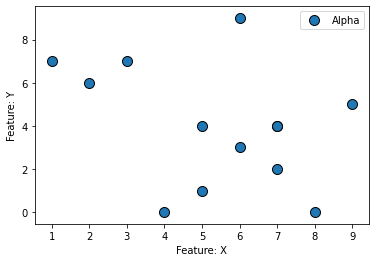

In [82]:
random.seed(42)

X, y = generate_neighborhood_in_rectangle('alpha', 13, 0, 10, 0, 10)
print(X)
print(y)

print(X[:0])
print(X[:1])
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Alpha'])
plt.xlabel('Feature: X')
plt.ylabel('Feature: Y')

Text(0, 0.5, 'Feature 2')

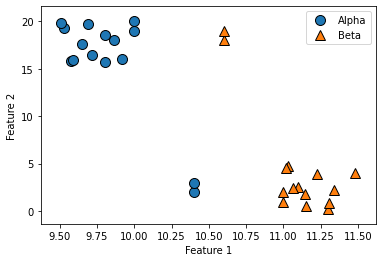

In [220]:
random.seed(42)

class_A_X, class_A_y = generate_neighborhood_in_rectangle('alpha', 11, 9.5, 10, 15, 20)
class_B_X, class_B_y = generate_neighborhood_in_rectangle('beta', 11, 11, 11.5, 0, 5)
X_train = np.concatenate((class_A_X, class_B_X))
y_train = np.concatenate((class_A_y, class_B_y))

# create the misclassified examples
border_alpha_1 = [10, 20]
border_alpha_2 = [10, 19]
border_beta_1 = [11, 1]
border_beta_2 = [11, 2]
misclassified_alpha_1 = [10.4, 2]
misclassified_alpha_2 = [10.4, 3]
misclassified_beta_1 = [10.6, 18]
misclassified_beta_2 = [10.6, 19]
X_train = np.append(
    X_train,
    [
        border_alpha_1, border_alpha_2,
        border_beta_1, border_beta_2,
        misclassified_alpha_1, misclassified_alpha_2,
        misclassified_beta_1, misclassified_beta_2,
    ],
    axis=0
)
# np.append(X_train, misclassified_beta_2)
y_train = np.append(
    y_train, [
        'alpha', 'alpha',
        'beta', 'beta',
        'alpha', 'alpha',
        'beta', 'beta',
    ]
)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.legend(['Alpha', 'Beta'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [221]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))

0.8666666666666667


In [222]:
y_predictions = knn.predict(X_train)

misclassified_indices = np.where((y_predictions != y_train))[0]
print(len(y_train))
print(len(misclassified_indices))
print(misclassified_indices)
for i in misclassified_indices:
    print(X_train[i])

30
4
[26 27 28 29]
[10.4  2. ]
[10.4  3. ]
[10.6 18. ]
[10.6 19. ]


In [223]:
def logreg_explore_and_graph(c_vals):
    hyperparameters = dict(C=c_vals)
    clf = GridSearchCV(clf, hyperparameters, cv=5)
    clf.fit(X_train, y_train)
    scores_logreg = clf.cv_results_['mean_test_score']
    std_scores = clf.cv_results_['std_test_score']
    optimal_c_val = clf.best_params_['C']
    print("Best C: ", optimal_c_val)
    print("Train score: ", LogisticRegression(C=optimal_c_val).fit(X_train, y_train).score(X_train, y_train))
    print(std_scores)
    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(4)
    plt.plot(c_vals, scores_logreg)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

1.0
Total item count:  30
Misclassified item count: 0
Misclassifed indices:  []


<AxesSubplot:xlabel='x', ylabel='y'>

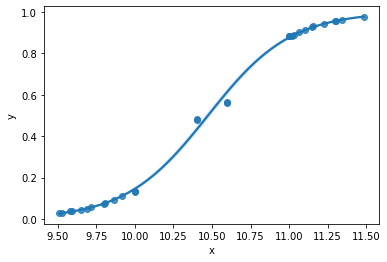

In [292]:
from scipy.special import expit
import seaborn as sns

# logreg_explore_and_graph(np.linspace(0, 3, 20))

logreg = LogisticRegression(C=2.5)
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))

y_predictions = logreg.predict(X_train)

misclassified_indices = np.where((y_predictions != y_train))[0]
print('Total item count: ', len(y_train))
print('Misclassified item count:', len(misclassified_indices))
print('Misclassifed indices: ', misclassified_indices)
for i in misclassified_indices:
    print(X_train[i])

data = {
    'x': X_train[:, 0],
    'y': logreg.predict_proba(X_train)[:, 1]
}
data_frame = pd.DataFrame(data, columns=['x', 'y'])
sns.regplot(x='x', y='y', data=data_frame, logistic=True)

In [293]:
import math

print(logreg.coef_)
feature_importance = pd.DataFrame(['feature 1', 'feature 2'], columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

[[ 3.49244729 -0.02273151]]
